## 빅데이터 활용 AI 설계
# 강화학습 : 시뮬레이션
- e-greedy 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 환경
- 5X5 의 격자가 있다.
- 마지막 Cell 에 도착하면 1 의 보상을 얻는다.
- 상태 : 25개 (Cell 수)
- 행동 : 4개 (상/하/좌/우)

In [126]:
Q = np.random.normal(0,0.1,size=[25,4])
Q[24] = 1

Qs = []
gamma = 0.99
ds = [-5,5,-1,1]

In [127]:
Q[:24].max(), Q.min()

(0.16461139793306104, -0.24048042679778076)

### 적용식

$$ (s,a) \Rightarrow r, s' $$
$$ Q_{new}(s,a) = r + \gamma \cdot max_{a'}[Q(s',a')] $$

- s: state
- a: action
- r: reward
- s': new state
- $\gamma$: discount rate
- s,a -> r,s -> a : sarsa

In [13]:
def valid_action(s, a):
    if s//5==0 and a==0: return False
    if s//5==4 and a==1: return False
    if s%5==0 and a==2: return False
    if s%5==4 and a==3: return False
    return True

In [125]:
def get_action(s, epsilon):
    actions = []
    for a in range(4):
        if valid_action(s,a): actions.append(a)
    
    if np.random.rand()<epsilon:
        the_a = np.random.choice(actions)
    else:
        max_q = -np.inf
        the_a = 0
        for a in actions:
            if Q[s,a]>max_q:
                max_q = Q[s,a]
                the_a = a
            elif Q[s,a]==max_q and np.random.randint(2)==0:
                max_q = Q[s,a]
                the_a = a
            
    return the_a

In [70]:
# 시뮬레이션 테스트

history = []
s = 0

while True:
    a = get_action(s,0.5)
    s2 = s + ds[a]
    history.append([s,a,s2])
    s = s2
    
    if s2==24: break
        
display(len(history), history)

190

[[0, 3, 1],
 [1, 2, 0],
 [0, 1, 5],
 [5, 0, 0],
 [0, 1, 5],
 [5, 0, 0],
 [0, 3, 1],
 [1, 3, 2],
 [2, 2, 1],
 [1, 3, 2],
 [2, 1, 7],
 [7, 1, 12],
 [12, 0, 7],
 [7, 1, 12],
 [12, 3, 13],
 [13, 2, 12],
 [12, 0, 7],
 [7, 3, 8],
 [8, 1, 13],
 [13, 2, 12],
 [12, 0, 7],
 [7, 1, 12],
 [12, 0, 7],
 [7, 1, 12],
 [12, 0, 7],
 [7, 2, 6],
 [6, 0, 1],
 [1, 3, 2],
 [2, 1, 7],
 [7, 1, 12],
 [12, 0, 7],
 [7, 2, 6],
 [6, 0, 1],
 [1, 3, 2],
 [2, 1, 7],
 [7, 0, 2],
 [2, 3, 3],
 [3, 2, 2],
 [2, 1, 7],
 [7, 1, 12],
 [12, 1, 17],
 [17, 0, 12],
 [12, 1, 17],
 [17, 1, 22],
 [22, 2, 21],
 [21, 2, 20],
 [20, 0, 15],
 [15, 3, 16],
 [16, 0, 11],
 [11, 2, 10],
 [10, 1, 15],
 [15, 3, 16],
 [16, 3, 17],
 [17, 1, 22],
 [22, 0, 17],
 [17, 1, 22],
 [22, 0, 17],
 [17, 1, 22],
 [22, 0, 17],
 [17, 3, 18],
 [18, 0, 13],
 [13, 1, 18],
 [18, 2, 17],
 [17, 2, 16],
 [16, 0, 11],
 [11, 1, 16],
 [16, 0, 11],
 [11, 3, 12],
 [12, 1, 17],
 [17, 1, 22],
 [22, 0, 17],
 [17, 1, 22],
 [22, 2, 21],
 [21, 0, 16],
 [16, 0, 11],
 [11, 0, 6]

In [128]:
histories = []
epsilon = 1.

for epoch in range(100):
    history = []
    s = 0
    epsilon = epsilon - epoch*0.01
    if epsilon<0.2: epsilon=0.2
    
    while True:
        a = get_action(s, epsilon)
        s2 = s + ds[a]
        history.append([s,a,s2])
        s = s2

        if s2==24: break
            
    #print(epoch, len(history))
            
    for h in history:
        Q[h[0],h[1]] = 0 + gamma*np.max(Q[h[2]])
    
    Qs.append(Q.copy())
    histories.append(history)

In [129]:
Q

array([[-7.81888330e-02,  9.22744694e-01, -2.39173522e-01,
         9.22744694e-01],
       [-6.53198726e-02,  9.32065348e-01,  9.13517247e-01,
         9.32065348e-01],
       [-1.84159383e-01,  9.41480149e-01,  9.22744694e-01,
         9.22744694e-01],
       [-4.61800847e-02,  9.32065348e-01,  9.32065348e-01,
         1.58125052e-01],
       [-1.81418593e-01,  1.59722275e-01,  9.22744694e-01,
         3.36536326e-02],
       [ 9.13517247e-01,  9.32065348e-01, -1.88018876e-03,
         9.32065348e-01],
       [ 9.22744694e-01,  9.41480149e-01,  9.22744694e-01,
         9.41480149e-01],
       [ 9.32065348e-01,  9.50990050e-01,  9.32065348e-01,
         9.32065348e-01],
       [ 9.22744694e-01,  9.41480149e-01,  9.41480149e-01,
         9.22744694e-01],
       [ 1.61335631e-01,  9.13517247e-01,  9.32065348e-01,
        -9.01623789e-02],
       [ 9.22744694e-01,  9.41480149e-01, -1.40347114e-01,
         9.41480149e-01],
       [ 9.32065348e-01,  9.50990050e-01,  9.32065348e-01,
      

In [130]:
Q.max(axis=1).reshape(5,5)

array([[0.92274469, 0.93206535, 0.94148015, 0.93206535, 0.92274469],
       [0.93206535, 0.94148015, 0.95099005, 0.94148015, 0.93206535],
       [0.94148015, 0.95099005, 0.96059601, 0.95099005, 0.94148015],
       [0.95099005, 0.96059601, 0.970299  , 0.9801    , 0.99      ],
       [0.96059601, 0.970299  , 0.9801    , 0.99      , 1.        ]])

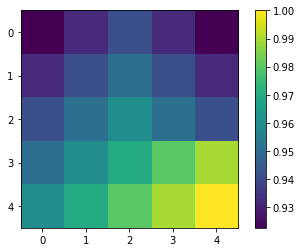

In [131]:
plt.imshow(Q.max(axis=1).reshape(5,5))
plt.colorbar()

In [132]:
Qs = np.array(Qs).reshape(-1,25,4)
Qs.shape

(100, 25, 4)

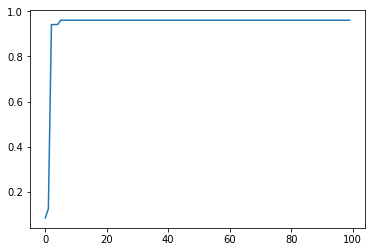

In [133]:
plt.plot(Qs.max(axis=2)[:,20])